In [ ]:
pip install scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


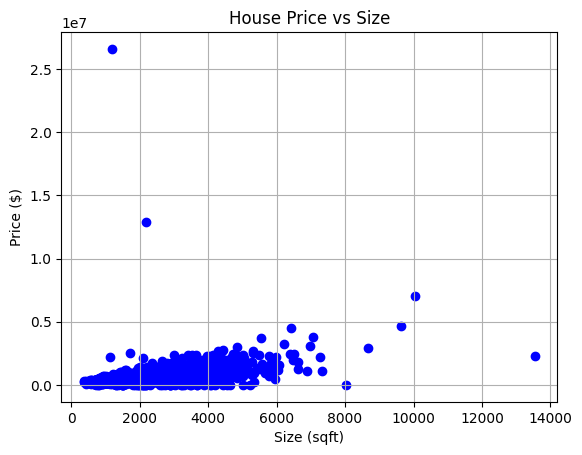

In [ ]:
# 📊 Visualize the data
plt.scatter(df['sqft_living'], df['price'], color='blue')
plt.title('House Price vs Size')
plt.xlabel('Size (sqft)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

In [ ]:
# Split data into input and target
X = df[['sqft_living']]
y = df['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_test.shape

(920, 1)

In [ ]:
# 🤖 Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print(f'b: {model.intercept_}')
print(f'w: {model.coef_[0]}')

b: 13661.634810741642
w: 253.64949906544499


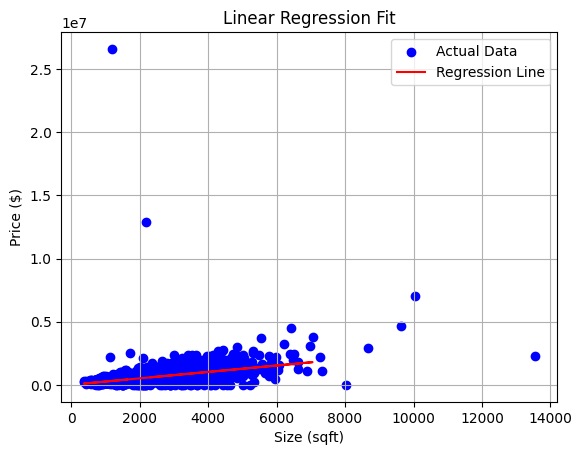

In [ ]:
# 📈 Predict on test data
y_pred = model.predict(X_test)

# Plot the regression line on the full dataset
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Size (sqft)')
plt.ylabel('Price ($)')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pred = model.predict([[10]])
pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16198.1298014])

In [ ]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 72698006969.48242
